In [103]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
parkinsons_data = pd.read_csv('/content/parkinsons.csv')
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [105]:
parkinsons_data.shape

(195, 24)

In [106]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [107]:
parkinsons_data['status'].value_counts()
     

1    147
0     48
Name: status, dtype: int64

In [108]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

<function matplotlib.pyplot.show(close=None, block=None)>

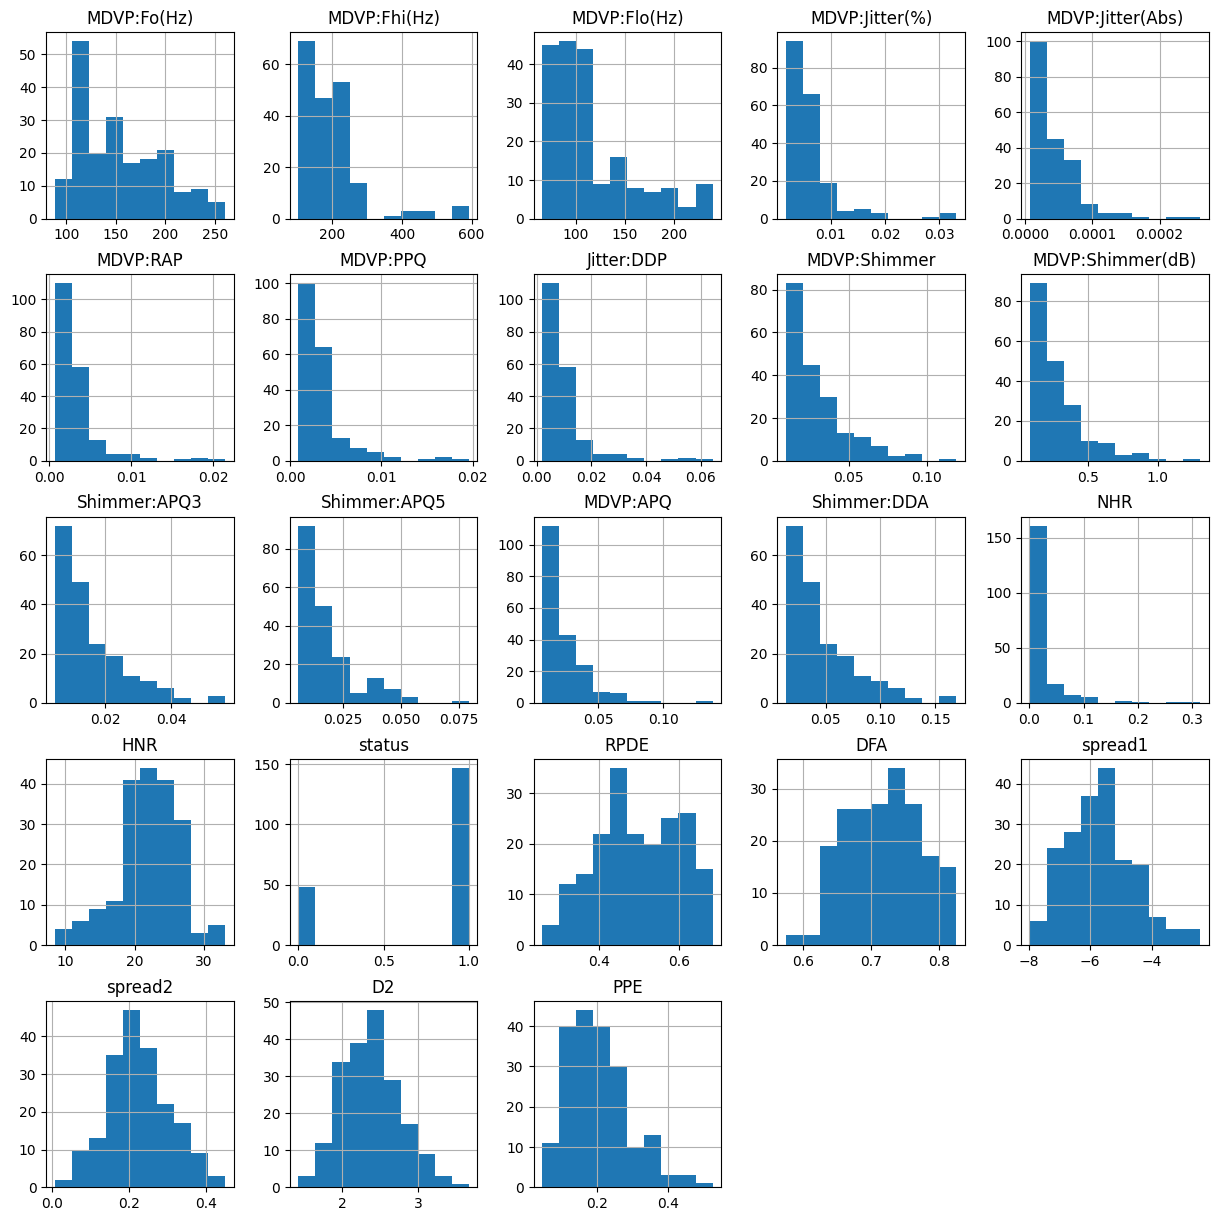

In [109]:
parkinsons_data.hist(figsize=(15,15))
plt.show

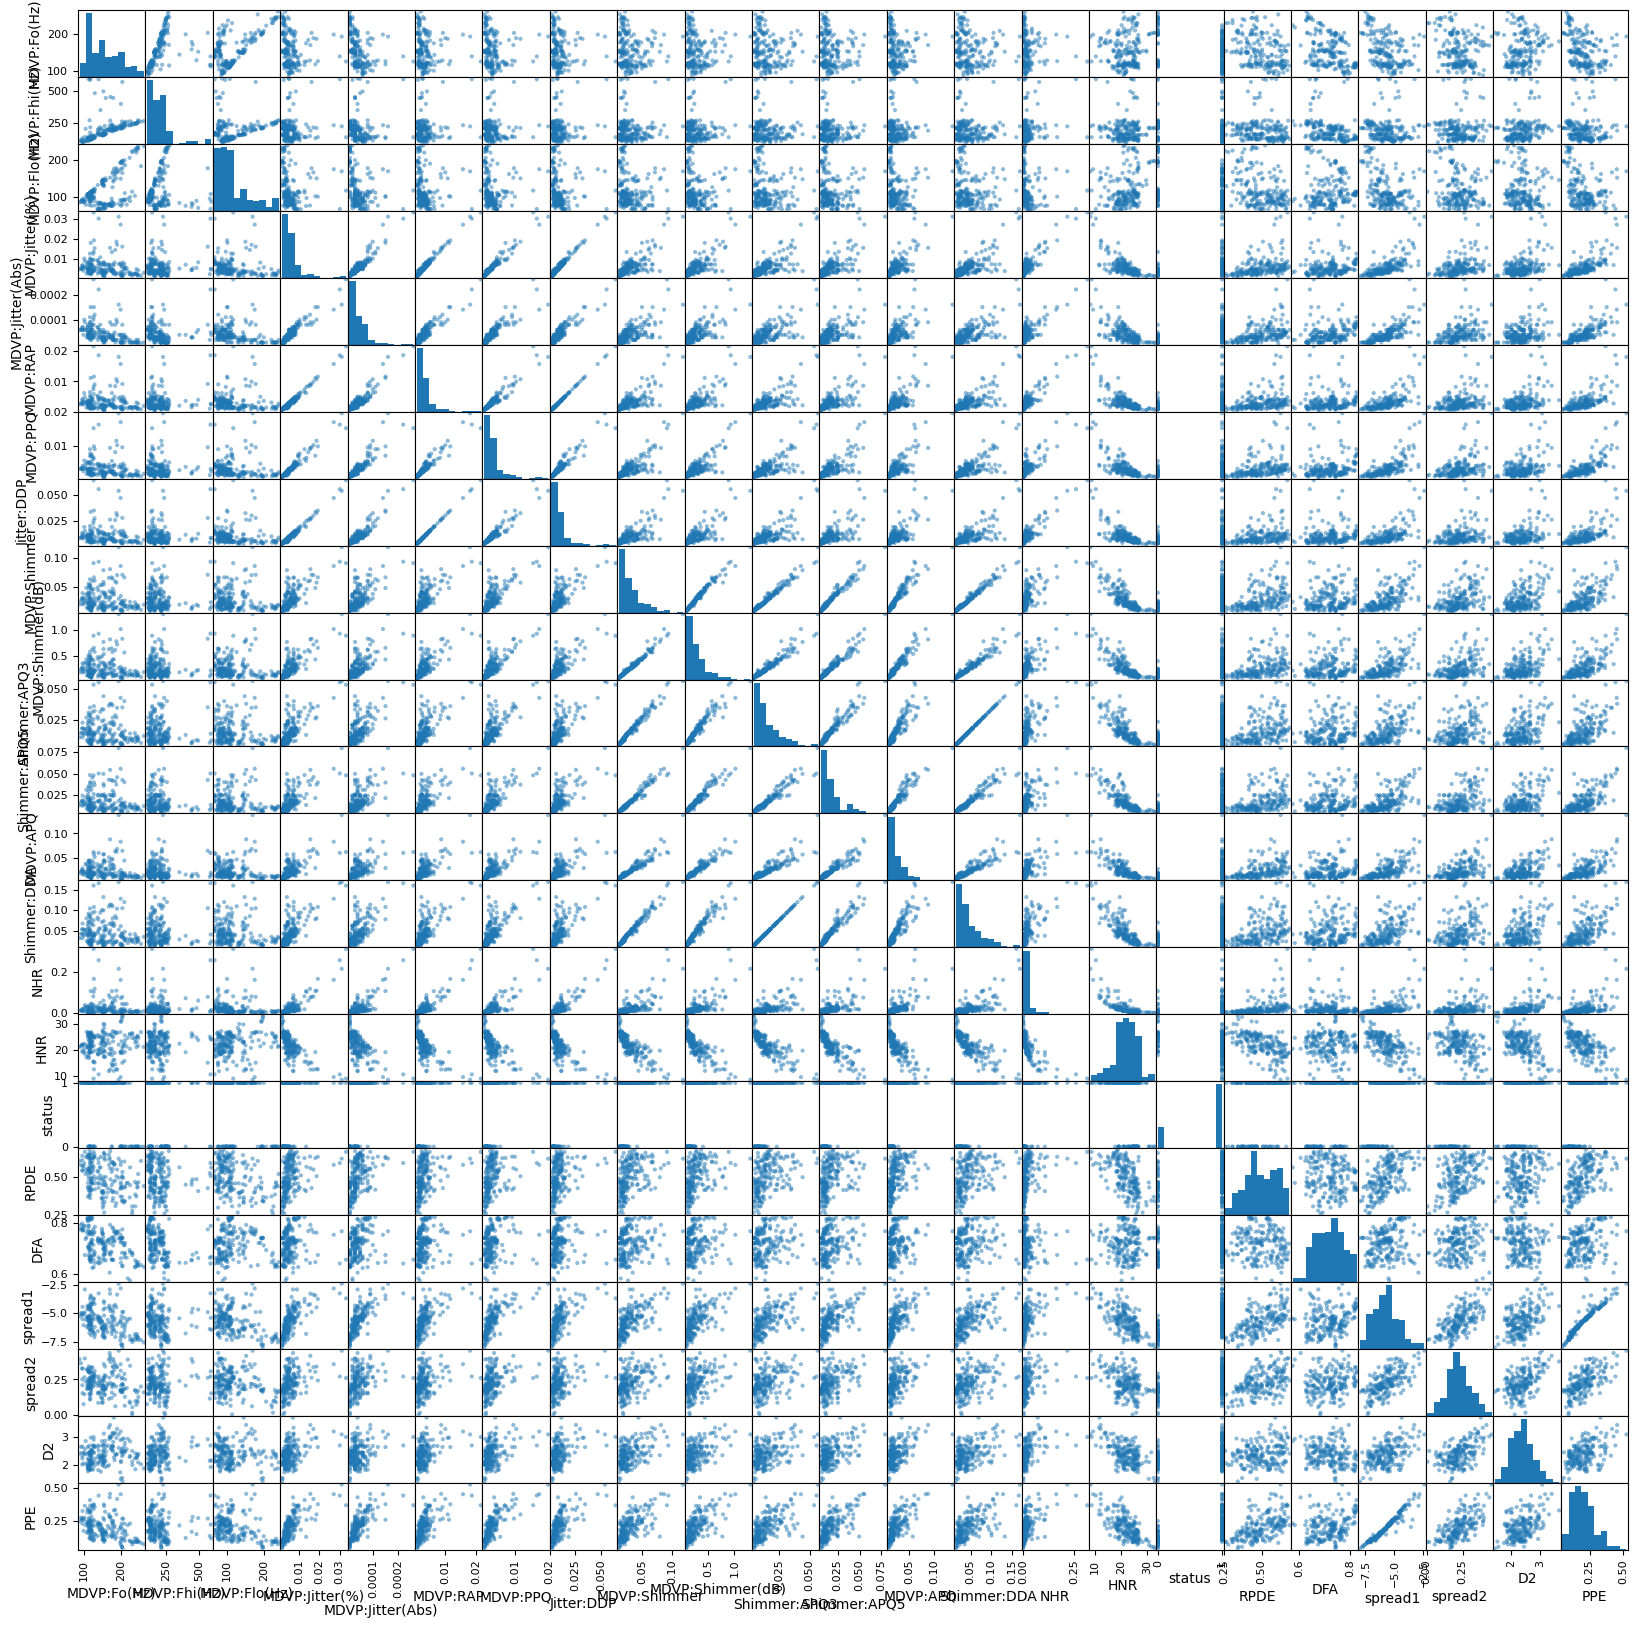

In [110]:
scatter_matrix(parkinsons_data,figsize=(20,20))
plt.show()

<ipython-input-111-10e8936ed7d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=parkinsons_data.corr()


<Axes: >

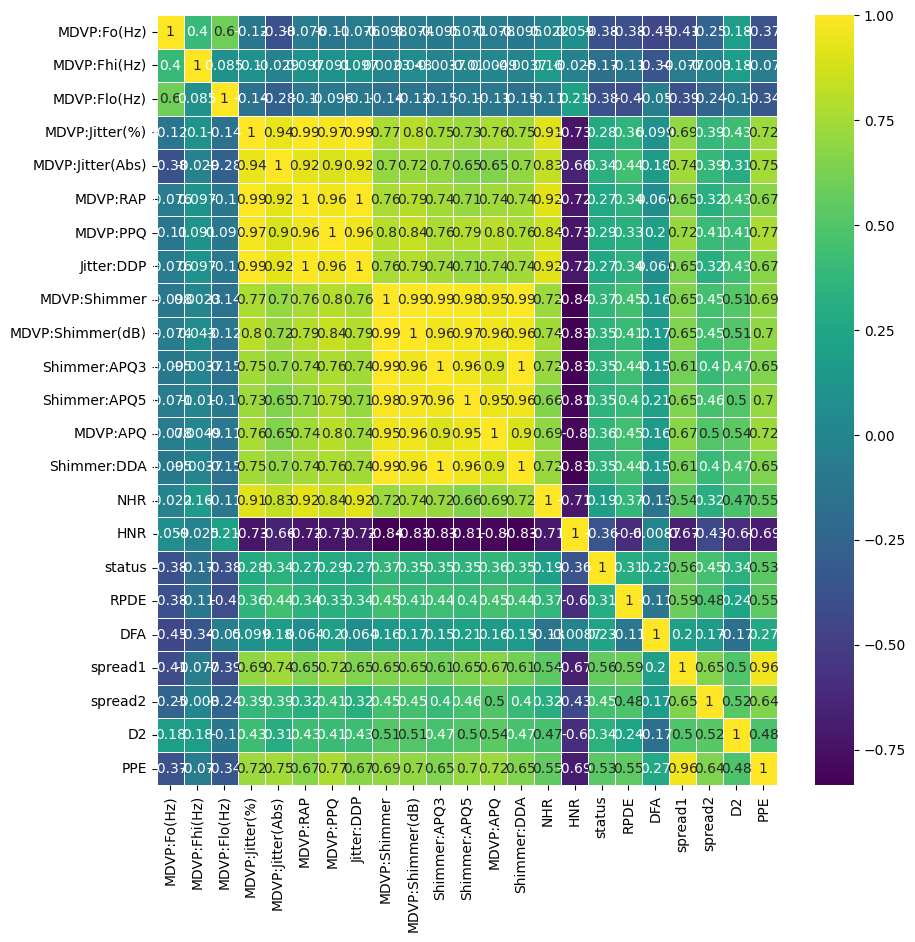

In [111]:
corrmat=parkinsons_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,cmap='viridis',annot=True,linewidth=0.5,)

In [112]:
from sklearn.feature_selection import mutual_info_classif
#mutual_info = mutual_info_classif(X_train,Y_train)
#mutual_info
#mutual_info = pd.Series(mutual_info)
#mutual_info.index = X_train.columns
#mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

mutual_info = mutual_info_classif(X, Y)

# Step 3: Rank the features
feature_scores = pd.Series(mutual_info, index=X.columns)
feature_scores = feature_scores.sort_values(ascending=False)

# Step 4: Select the top-k features
k = 18  # Number of features to select
top_k_features = feature_scores[:k].index.tolist()

# Step 5: Subset the dataset with selected features
X_subset = X[top_k_features]
print(X_subset)

          PPE   spread1  MDVP:Fo(Hz)   spread2  MDVP:APQ  MDVP:Flo(Hz)  \
0    0.284654 -4.813031      119.992  0.266482   0.02971        74.997   
1    0.368674 -4.075192      122.400  0.335590   0.04368       113.819   
2    0.332634 -4.443179      116.682  0.311173   0.03590       111.555   
3    0.368975 -4.117501      116.676  0.334147   0.03772       111.366   
4    0.410335 -3.747787      116.014  0.234513   0.04465       110.655   
..        ...       ...          ...       ...       ...           ...   
190  0.133050 -6.538586      174.188  0.121952   0.02745        94.261   
191  0.168895 -6.195325      209.516  0.129303   0.01879        89.488   
192  0.131728 -6.787197      174.688  0.158453   0.01667        74.287   
193  0.123306 -6.744577      198.764  0.207454   0.01588        74.904   
194  0.148569 -5.724056      214.289  0.190667   0.01373        77.973   

     MDVP:Jitter(Abs)  MDVP:Fhi(Hz)     HNR      NHR  MDVP:Jitter(%)  \
0             0.00007       157.302  21

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X_subset, Y, test_size=0.2, random_state=2)
     
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 18) (39, 18)


In [114]:
Svmmodel = svm.SVC(kernel='linear')
Svmmodel.fit(X_train, Y_train) 

X_train_predictionSvm = Svmmodel.predict(X_train)
training_data_accuracySvm = accuracy_score(X_train_predictionSvm, Y_train)

print('Accuracy on Training data : ', training_data_accuracySvm)

X_test_predictionSvm = Svmmodel.predict(X_test)
test_data_accuracySvm = accuracy_score(X_test_predictionSvm, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracySvm)

Accuracy on Training data :  0.8717948717948718
Accuracy on Test data :  0.8205128205128205


In [115]:
DTmodel= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DTmodel.fit(X_train, Y_train) 

X_train_predictionDT = DTmodel.predict(X_train)
training_data_accuracyDT = accuracy_score(X_train_predictionDT, Y_train)

print('Accuracy on Training data : ', training_data_accuracyDT)

X_test_predictionDT = DTmodel.predict(X_test)
test_data_accuracyDT = accuracy_score(X_test_predictionDT, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyDT)

Accuracy on Training data :  1.0
Accuracy on Test data :  0.8717948717948718


In [116]:
RFmodel= RandomForestClassifier(n_estimators=10,criterion="entropy")
RFmodel.fit(X_train, Y_train) 

X_train_predictionRF = RFmodel.predict(X_train)
training_data_accuracyRF = accuracy_score(X_train_predictionRF, Y_train)

print('Accuracy on Training data : ', training_data_accuracyRF)

X_test_predictionRF = RFmodel.predict(X_test)
test_data_accuracyRF = accuracy_score(X_test_predictionRF, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyRF)

Accuracy on Training data :  0.9935897435897436
Accuracy on Test data :  0.6410256410256411


In [117]:
KnnModel=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KnnModel.fit(X_train,Y_train)

X_train_predictionKnn = KnnModel.predict(X_train)
training_data_accuracyKnn = accuracy_score(X_train_predictionKnn, Y_train)

print('Accuracy on Training data : ', training_data_accuracyKnn)

X_test_predictionKnn = KnnModel.predict(X_test)
test_data_accuracyKnn = accuracy_score(X_test_predictionKnn, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyKnn)

Accuracy on Training data :  0.8717948717948718
Accuracy on Test data :  0.7435897435897436


In [118]:
LrModel=LogisticRegression(random_state=0)
LrModel.fit(X_train,Y_train)

X_train_predictionLr = LrModel.predict(X_train)
training_data_accuracyLr = accuracy_score(X_train_predictionLr, Y_train)

print('Accuracy on Training data : ', training_data_accuracyLr)

X_test_predictionLr = LrModel.predict(X_test)
test_data_accuracyLr = accuracy_score(X_test_predictionLr, Y_test)
     
print('Accuracy on Test data : ', test_data_accuracyLr)

Accuracy on Training data :  0.8589743589743589
Accuracy on Test data :  0.8205128205128205


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
train=[]
test=[]

train.append(training_data_accuracySvm)
test.append(test_data_accuracySvm)
train.append(training_data_accuracyDT)
test.append(test_data_accuracyDT)
train.append(training_data_accuracyRF)
test.append(test_data_accuracyRF)
train.append(training_data_accuracyKnn)
test.append(test_data_accuracyKnn)
train.append(training_data_accuracyLr)
test.append(test_data_accuracyLr)

print(train)
print(test)

[0.8717948717948718, 1.0, 0.9935897435897436, 0.8717948717948718, 0.8589743589743589]
[0.8205128205128205, 0.8717948717948718, 0.6410256410256411, 0.7435897435897436, 0.8205128205128205]


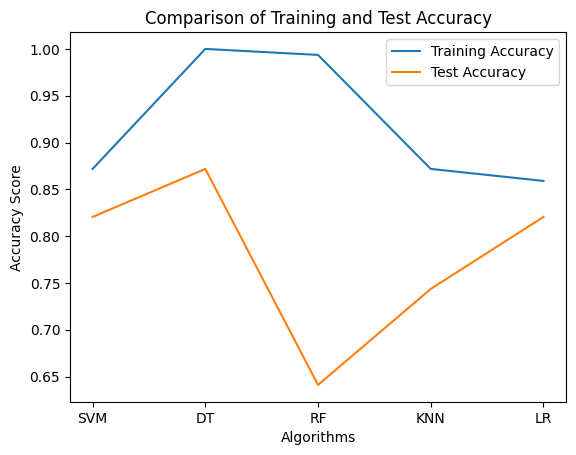

In [120]:
from matplotlib import pyplot as plt  
import numpy as np  
  
algorithms = ["SVM", "DT", "RF","KNN","LR"]

training_scores = train
test_scores =test

# Plotting
plt.plot(algorithms, training_scores, label='Training Accuracy')
plt.plot(algorithms, test_scores, label='Test Accuracy')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Training and Test Accuracy')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [122]:
input_data = (0.284654,-4.813031,119.992,0.266482,0.02971,74.997, 0.00007,157.302,21.033,0.02211,0.00784, 0.03130,0.02182,0.06545,0.426,0.00554, 0.00370,0.04374  )

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = DTmodel.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [125]:
import pickle
     

filename = 'parkinsons_disease_model.sav'
pickle.dump(Svmmodel, open(filename, 'wb'))
     

 #loading the saved model
loaded_model = pickle.load(open('parkinsons_disease_model.sav', 'rb'))
for column in X_train.columns:
  print(column)

PPE
spread1
MDVP:Fo(Hz)
spread2
MDVP:APQ
MDVP:Flo(Hz)
MDVP:Jitter(Abs)
MDVP:Fhi(Hz)
HNR
NHR
MDVP:Jitter(%)
Shimmer:APQ5
Shimmer:APQ3
Shimmer:DDA
MDVP:Shimmer(dB)
MDVP:PPQ
MDVP:RAP
MDVP:Shimmer
